In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Social_Network_Ads.csv')

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
X=data.iloc[:,2:4]

In [8]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [9]:
y=data.iloc[:,-1]

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler()

In [14]:
X=scaler.transform(X)

In [15]:
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [18]:
print(X.shape,X_train.shape,X_test.shape)

(400, 2) (320, 2) (80, 2)


In [19]:
np.sqrt(X_train.shape[0])

17.88854381999832

In [20]:
k=17

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=k)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [24]:
y_pred =knn.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred)

0.925

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[48,  4],
       [ 2, 26]], dtype=int64)

In [44]:
#method 2 hit and trail

In [29]:
accuracy = []
for i in range (1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [30]:
len(accuracy)

25

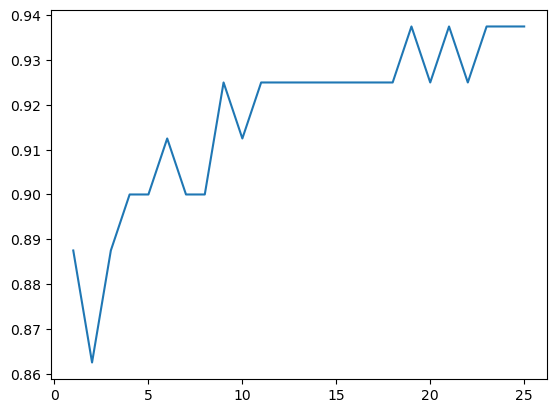

In [31]:
plt.plot(range(1,26),accuracy)
plt.show()

In [32]:
 knn = KNeighborsClassifier(n_neighbors=11)
 knn.fit(X_train,y_train)
 y_pred = knn.predict(X_test)
    

In [33]:
accuracy_score(y_test,y_pred)

0.925

In [67]:
def predict_output():
    age = int(input("Enter Your Age"))
    salary = int(input("Enter Your Salary"))

    X_new = np.array([[age],[salary]]).reshape(1,2)
    X_new = scaler.transform(X_new)
    if knn.predict(X_new)[0]==0:
        return "Will Not Purchase"
    else:
        return "Will Purchase"

In [36]:
predict_output()

Enter Your Age 22
Enter Your Salary 80000


'Will Not Purchase'

In [61]:
# desision BOundary
#1>meshGrid

In [37]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)

In [38]:
print(a.shape,b.shape)

(602,) (597,)


In [39]:
XX,YY=np.meshgrid(a,b)

In [40]:
XX.shape

(597, 602)

In [41]:
YY.shape

(597, 602)

In [42]:
#classifying every points on the meshgrid

In [53]:
input_array=np.array([XX.ravel(),YY.ravel()]).T
labels = knn.predict(input_array)

In [54]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [55]:
#plotting the array as image


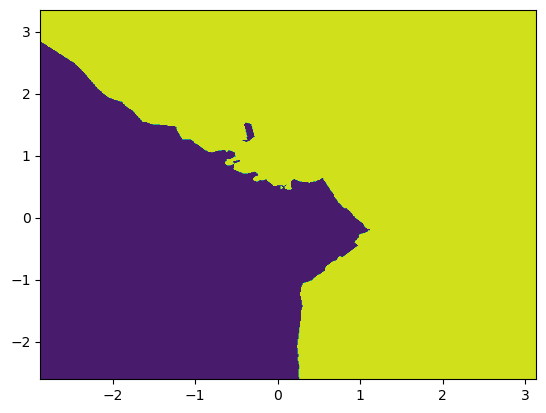

In [56]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.show()

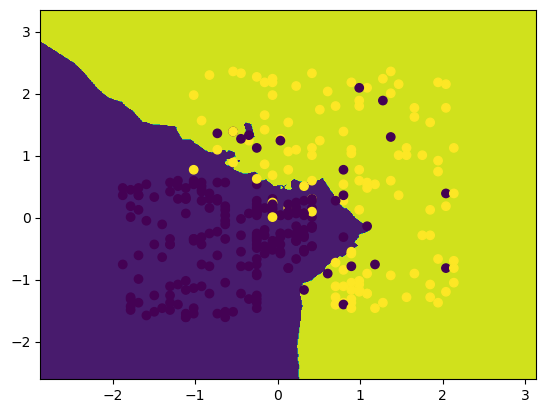

In [58]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [59]:
#effect of k on  training error rate and validation error rate

In [72]:
error_train= []
error_test=[]
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    x=confusion_matrix(y_train,knn.predict(X_train))
    y=confusion_matrix(y_test,knn.predict(X_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())

In [73]:
error_test

[0.1125,
 0.1375,
 0.1125,
 0.1,
 0.1,
 0.0875,
 0.1,
 0.1,
 0.075,
 0.0875,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.0625,
 0.075,
 0.0625,
 0.075,
 0.0625,
 0.0625,
 0.0625]

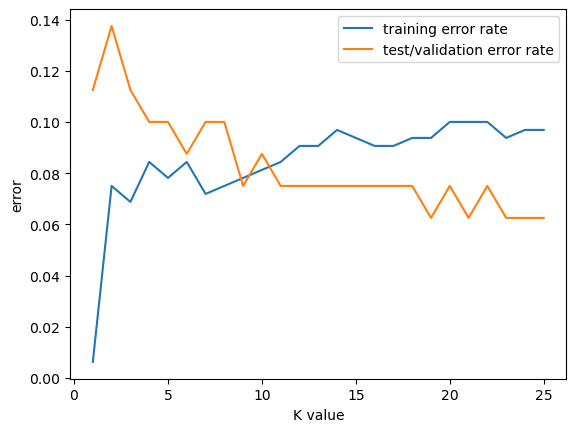

In [74]:
plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_test,label='test/validation error rate')
plt.xlabel('K value')
plt.ylabel('error')
plt.legend()
plt.show()